In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm


[*********************100%%**********************]  1 of 1 completed


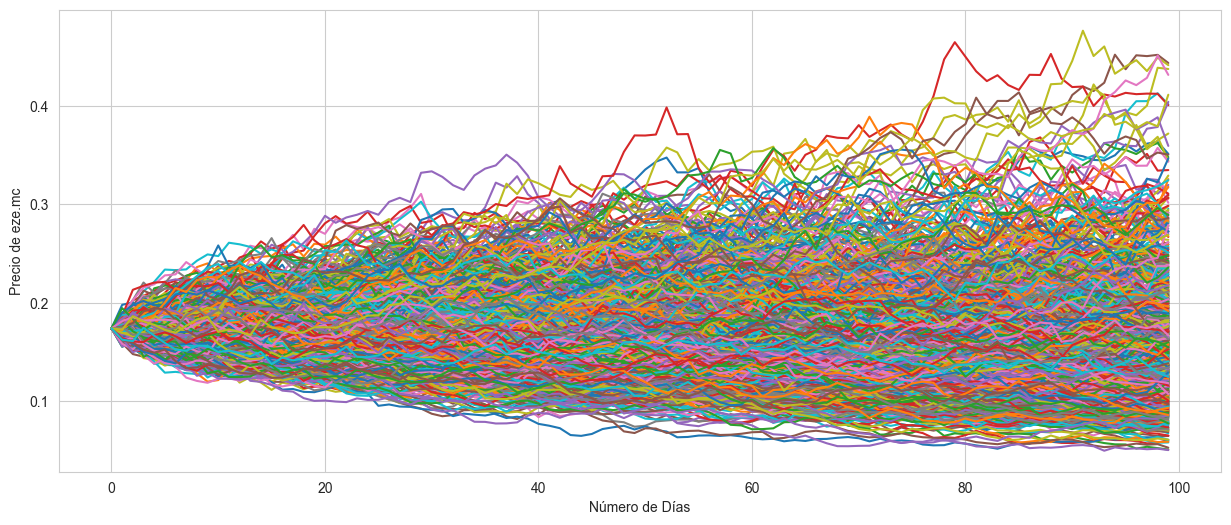

In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

ticker = 'eze.mc'
data = yf.download(ticker, start='2012-01-01')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

days = 100
trials = 1000

Z = norm.ppf(np.random.rand(days, trials))
returns_daily = np.exp(drift + stdev * Z)
price_paths = np.zeros_like(returns_daily)
price_paths[0] = data.iloc[-1]

for t in range(1, days):
    price_paths[t] = price_paths[t - 1] * returns_daily[t]

plt.figure(figsize=(15, 6))
plt.plot(pd.DataFrame(price_paths))
plt.xlabel("Número de Días")
plt.ylabel("Precio de " + ticker)
plt.show()


